# CASE STUDY ON AIR POLLUTION

# INTRODUCTION TO THE TOPIC:

Air pollution is contamination of the indoor or outdoor environment by any chemical, physical or biological agent that modifies the natural characteristics of the atmosphere. 
WHO data show that almost all of the global population (99%) breathe air that exceeds WHO guideline limits and contains high levels of pollutants, with low- and middle-income countries suffering from the highest exposures. 

The WHO (World Health Organization) air quality database compiles data on ground measurements of annual mean concentrations of nitrogen dioxide (NO2), "Particulate Matter" of a diameter equal or smaller than 10 μm (PM10) or equal or smaller than 2.5 μm (PM2.5) which aim at representing an average for the city or town as a whole, rather than for individual stations. Both groups of pollutants originate mainly from human activities related to fossil fuel combustion.

The database was released in April 2022 and currently hosts data on air quality for over 6000 human settlements in more than 100 countries.
The database is updated regularly every 2-3 years since 2011 and this is the fifth update. The data compiled in this database is used as input to derive the Sustainable Development Goal Indicator 11.6.2, Air quality in cities, for which WHO is custodial agency.

As per the latest reports of 2021, Africa, the second largest continent (after Asia) is home to some of the world's most polluted cities while Bangladesh has an average PM2.5 concentration of 76.9 micrograms per cubic meter of air (µg/m3) in 2021, making it the most polluted country in the world. 

# PROBLEM STATEMENT:

The latest data of 2021 says that India is the third-most polluted country in the world, with an average PM2.5 concentration of 51.90. Of the 30 most polluted cities in the world, 21 of them are located in India.
Bhiwadi in Rajasthan is the highly polluted city in India as of 2021 (the analysis of which is done at the later stage of the model).

Keeping the harmful effect of air pollution that it causes, in mind, the "problem statement" here is to study the air pollution in India for year 2010-2019 (except 2015).

The factors involved are: 

- "PM2.5" (particles less than 2.5 micrometers in diameter) can penetrate deeply into the lung, irritate and corrode the alveolar wall, and consequently impair lung function.
- PM10 describes inhalable particles, with diameters that are generally 10 micrometers and smaller.
- NO2, is a gaseous air pollutant composed of nitrogen and oxygen which forms when fossil fuels such as coal, oil, gas or diesel are burned at high temperatures

# OBJECTIVE:

The aim of the study is to compare the air pollution in the cities (region-wise) of India and use the suitable predictive analysis to conclude the study.
Since we have time (years) included in our study, the best way to model and analyse the data is "Time Series Analysis".

We start our analysis with the pre-requisites of loading the required libraries and importing the dataset.

In [1]:
#importing the libraries and dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
air_p = pd.read_excel(r'E:/DATASETS/air_p_ds.xlsx')
d = pd.DataFrame(air_p)
d.head()

,WHO_Region,ISO3,Country,City,Year,PM2_5,PM10,NO2,PM2_5_p,PM10_p,NO2_p,Reference,Monitoring Station,Version of Database,Status
0,Eastern Mediterranean Region,AFG,Afghanistan,Kabul,2019,119.77,NaN,NaN,18.0,NaN,NaN,"U.S. Department of State, United States Enviro...",NaN,2022,NaN
1,European Region,ALB,Albania,Durres,2015,NaN,17.65,26.63,NaN,NaN,83.961187,European Environment Agency (downloaded in 2021),NaN,2022,NaN
2,European Region,ALB,Albania,Durres,2016,14.32,24.56,24.78,NaN,NaN,87.932605,European Environment Agency (downloaded in 2021),NaN,2022,NaN
3,European Region,ALB,Albania,Elbasan,2015,NaN,NaN,23.96,NaN,NaN,97.853881,European Environment Agency (downloaded in 2021),NaN,2022,NaN
4,European Region,ALB,NaN,Elbasan,2016,NaN,NaN,26.26,NaN,NaN,96.049636,European Environment Agency (downloaded in 2021),NaN,2022,NaN


In [2]:
d.info() #gives the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32131 entries, 0 to 32130
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   WHO_Region           32130 non-null  object 
 1   ISO3                 32131 non-null  object 
 2   Country              32130 non-null  object 
 3   City                 32131 non-null  object 
 4   Year                 32131 non-null  int64  
 5   PM2_5                14989 non-null  object 
 6   PM10                 21106 non-null  float64
 7   NO2                  22198 non-null  float64
 8   PM2_5_p              7275 non-null   float64
 9   PM10_p               5374 non-null   float64
 10  NO2_p                19893 non-null  float64
 11  Reference            32131 non-null  object 
 12  Monitoring Station   8651 non-null   object 
 13  Version of Database  32131 non-null  int64  
 14  Status               0 non-null      float64
dtypes: float64(6), int64(2), object(7)
m

In [3]:
d.shape

(32131, 15)

We see our original dataset has 32131 rows and 15 columns 

In [4]:
d.columns

Index(['WHO_Region', 'ISO3', 'Country ', 'City', 'Year', 'PM2_5', 'PM10',
       'NO2', 'PM2_5_p', 'PM10_p', 'NO2_p', 'Reference', 'Monitoring Station',
       'Version of Database', 'Status'],
      dtype='object')

The columns we have in the dataset include WHO_Region, IS03 (abbreviation of countries), Country and their respective Cities, Year and the factors. 

Next, we import the data for India to be specifically used in our analysis. To study the data of our country region wise, we have created another column specifying regions of cities (North, South, East, West and Central India).

In [5]:
#importing Indian data (with a new column "region" included in it)
india = pd.read_excel(r'E:/DATASETS/cs-dataset.xlsx')
df = pd.DataFrame(india)
df.head()

,WHO_Region,ISO3,Country,Region,City,Year,PM2_5,PM10,NO2,PM2_5_p,PM10_p,NO2_p,Reference,Monitoring_Station,Version_of_Database,Status
0,South East Asia Region,IND,India,Central,Amlai,2016,26.5,73.0,22.50,41.346154,66.826923,66.826923,Central Pollution Control Board,2 NA,2022,NaN
1,South East Asia Region,IND,India,Central,Amlai,2017,30.0,82.0,24.50,84.134615,86.057692,86.057692,Central Pollution Control Board,2 NA,2022,NaN
2,South East Asia Region,IND,India,Central,Amlai,2018,29.0,90.5,20.50,99.038461,98.557692,98.557692,Central Pollution Control Board,2 NA,2022,NaN
3,South East Asia Region,IND,India,Central,Amlai,2019,NaN,85.0,19.50,NaN,62.019231,62.019231,Central Pollution Control Board,2 NA,2022,NaN
4,South East Asia Region,IND,India,Central,Bhillai,2010,NaN,NaN,22.33,NaN,NaN,85.897436,Central Pollution Control Board,3 NA,2022,NaN


In [6]:
#gives the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   WHO_Region           2264 non-null   object 
 1   ISO3                 2264 non-null   object 
 2   Country              2264 non-null   object 
 3   Region               2264 non-null   object 
 4   City                 2264 non-null   object 
 5   Year                 2264 non-null   int64  
 6   PM2_5                421 non-null    float64
 7   PM10                 1196 non-null   float64
 8   NO2                  2130 non-null   float64
 9   PM2_5_p              441 non-null    float64
 10  PM10_p               1211 non-null   float64
 11  NO2_p                2183 non-null   float64
 12  Reference            2264 non-null   object 
 13  Monitoring_Station   2263 non-null   object 
 14  Version_of_Database  2264 non-null   int64  
 15  Status               0 non-null      f

Next, to work on Time Series Analysis, we convert the object (Year) to time series object.

In [7]:
df['Year']=df['Year'].astype(str).astype('datetime64')
df['Year']
df.info() #year object converted to year time stamp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   WHO_Region           2264 non-null   object        
 1   ISO3                 2264 non-null   object        
 2   Country              2264 non-null   object        
 3   Region               2264 non-null   object        
 4   City                 2264 non-null   object        
 5   Year                 2264 non-null   datetime64[ns]
 6   PM2_5                421 non-null    float64       
 7   PM10                 1196 non-null   float64       
 8   NO2                  2130 non-null   float64       
 9   PM2_5_p              441 non-null    float64       
 10  PM10_p               1211 non-null   float64       
 11  NO2_p                2183 non-null   float64       
 12  Reference            2264 non-null   object        
 13  Monitoring_Station   2263 non-nul

In [8]:
#column details
df.columns

Index(['WHO_Region', 'ISO3', 'Country ', 'Region', 'City', 'Year', 'PM2_5',
       'PM10', 'NO2', 'PM2_5_p', 'PM10_p', 'NO2_p', 'Reference',
       'Monitoring_Station', 'Version_of_Database', 'Status'],
      dtype='object')

In [9]:
#data description
df.describe()

,PM2_5,PM10,NO2,PM2_5_p,PM10_p,NO2_p,Version_of_Database,Status
count,421.000000,1196.000000,2130.000000,441.000000,1211.000000,2183.000000,2264.000000,0.0
mean,40.444798,98.367433,21.968427,72.796073,86.639266,83.678673,2021.997350,NaN
std,20.200245,50.346215,12.713677,27.368950,18.213125,21.857936,0.126099,NaN
min,7.000000,8.500000,2.000000,1.923077,6.730769,1.923077,2016.000000,NaN
25%,28.000000,63.000000,13.000000,53.846154,81.250000,76.923077,2022.000000,NaN
50%,36.000000,88.000000,19.000000,82.692308,94.230769,93.269231,2022.000000,NaN
75%,47.000000,119.000000,28.000000,98.076923,100.000000,100.000000,2022.000000,NaN
max,123.500000,322.000000,87.500000,100.000000,100.000000,100.000000,2022.000000,NaN


The above description gives us the summary of the dataset, including the statistical functions of mean, median and mode.

In [10]:
df.shape

(2264, 16)

Shape of the dataframe gives us the total number of rows (2264) and columns (16) for the Indian dataset.

In [11]:
#Removing the irrelevant columns
nr=['WHO_Region','ISO3','Reference','Monitoring_Station','Version_of_Database','Status']  
df1=df.drop(nr,axis=1)
df1

,Country,Region,City,Year,PM2_5,PM10,NO2,PM2_5_p,PM10_p,NO2_p
0,India,Central,Amlai,2016-01-01,26.5,73.0,22.50,41.346154,66.826923,66.826923
1,India,Central,Amlai,2017-01-01,30.0,82.0,24.50,84.134615,86.057692,86.057692
2,India,Central,Amlai,2018-01-01,29.0,90.5,20.50,99.038461,98.557692,98.557692
3,India,Central,Amlai,2019-01-01,NaN,85.0,19.50,NaN,62.019231,62.019231
4,India,Central,Bhillai,2010-01-01,NaN,NaN,22.33,NaN,NaN,85.897436
...,...,...,...,...,...,...,...,...,...,...
2259,India,West,Vasco,2014-01-01,NaN,NaN,8.00,NaN,NaN,40.384615
2260,India,West,Vasco,2016-01-01,55.5,102.5,9.50,38.942308,82.692308,82.692308
2261,India,West,Vasco,2017-01-01,NaN,89.0,11.00,NaN,86.538461,85.576923
2262,India,West,Vasco,2018-01-01,NaN,83.0,11.00,7.692308,81.730769,81.730769


In [12]:
#checking for null values
nv=df1.isnull().sum()
nv

Country        0
Region         0
City           0
Year           0
PM2_5       1843
PM10        1068
NO2          134
PM2_5_p     1823
PM10_p      1053
NO2_p         81
dtype: int64

We see there are multiple null values in the dataset. So, to fill the null values, we check the box plot for every factor and fill the null values with the required imputation technique.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PM2_5'>

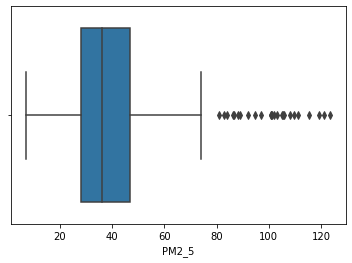

In [13]:
sns.boxplot(df1.PM2_5)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PM10'>

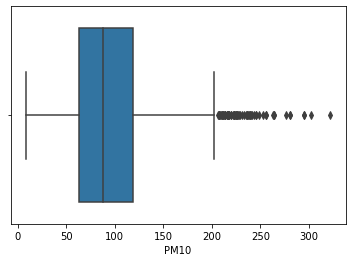

In [14]:
sns.boxplot(df1.PM10)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NO2'>

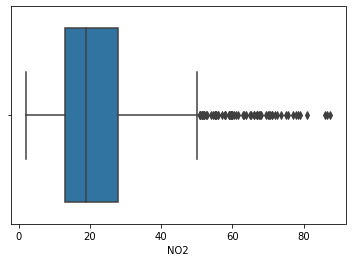

In [15]:
sns.boxplot(df1.NO2)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PM2_5_p'>

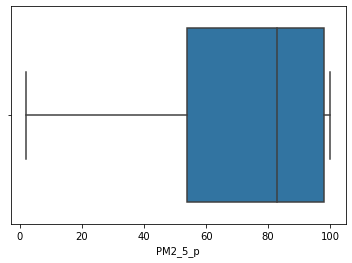

In [16]:
sns.boxplot(df1.PM2_5_p)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PM10_p'>

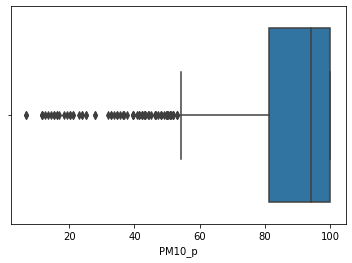

In [17]:
sns.boxplot(df1.PM10_p)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NO2_p'>

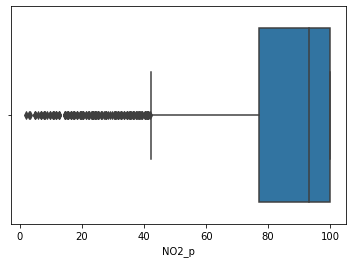

In [18]:
sns.boxplot(df1.NO2_p)

We use the technique of "median imputation" to fill the null values. In this, the missing values are replaced with the median value of the entire feature column. When the data is skewed, it is good to consider using the median value for replacing the missing values.

In [19]:
d1=df1.fillna(df1.median()) #filling the null values using median
d1

C:\Users\hp\AppData\Local\Temp/ipykernel_10984/2179746490.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  d1=df1.fillna(df1.median()) #filling the null values using median
C:\Users\hp\AppData\Local\Temp/ipykernel_10984/2179746490.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  d1=df1.fillna(df1.median()) #filling the null values using median


,Country,Region,City,Year,PM2_5,PM10,NO2,PM2_5_p,PM10_p,NO2_p
0,India,Central,Amlai,2016-01-01,26.5,73.0,22.50,41.346154,66.826923,66.826923
1,India,Central,Amlai,2017-01-01,30.0,82.0,24.50,84.134615,86.057692,86.057692
2,India,Central,Amlai,2018-01-01,29.0,90.5,20.50,99.038461,98.557692,98.557692
3,India,Central,Amlai,2019-01-01,36.0,85.0,19.50,82.692308,62.019231,62.019231
4,India,Central,Bhillai,2010-01-01,36.0,88.0,22.33,82.692308,94.230769,85.897436
...,...,...,...,...,...,...,...,...,...,...
2259,India,West,Vasco,2014-01-01,36.0,88.0,8.00,82.692308,94.230769,40.384615
2260,India,West,Vasco,2016-01-01,55.5,102.5,9.50,38.942308,82.692308,82.692308
2261,India,West,Vasco,2017-01-01,36.0,89.0,11.00,82.692308,86.538461,85.576923
2262,India,West,Vasco,2018-01-01,36.0,83.0,11.00,7.692308,81.730769,81.730769


In [20]:
d=d1.isnull().sum()
d

Country     0
Region      0
City        0
Year        0
PM2_5       0
PM10        0
NO2         0
PM2_5_p     0
PM10_p      0
NO2_p       0
dtype: int64

On checking the data, we see there are no null values in anymore. Hence, the data is pre-processed and cleaned before using it for the further analysis.

# EXPLORATORY DATA ANALYSIS

We plot the required time series visualization graphs to help us with the interpretation of the data.

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'PM2_5'}>,
        <AxesSubplot:title={'center':'PM10'}>],
       [<AxesSubplot:title={'center':'NO2'}>,
        <AxesSubplot:title={'center':'PM2_5_p'}>,
        <AxesSubplot:title={'center':'PM10_p'}>],
       [<AxesSubplot:title={'center':'NO2_p'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

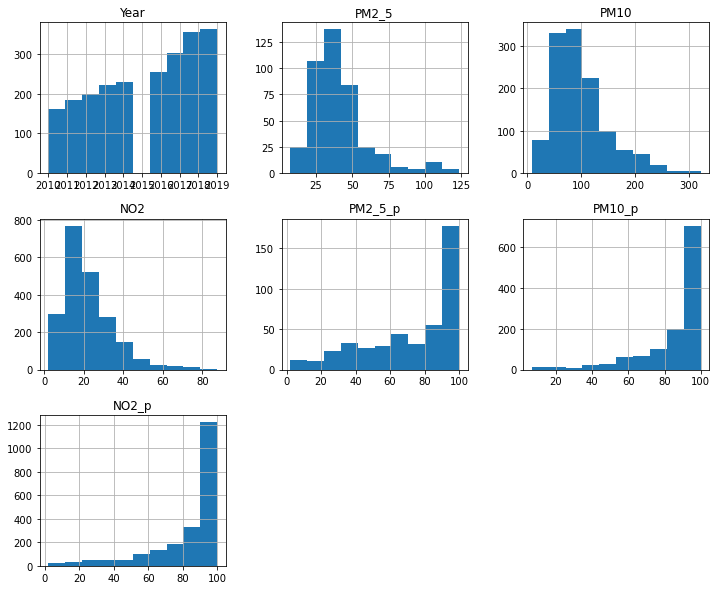

In [21]:
#histogram-
df1.hist(figsize=(12,10))

The above plot of Histogram shows that the data values are continuous variables of time series. We see a pattern of skewness in the factors associated with the air pollution, depecting non-normal distribution.

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

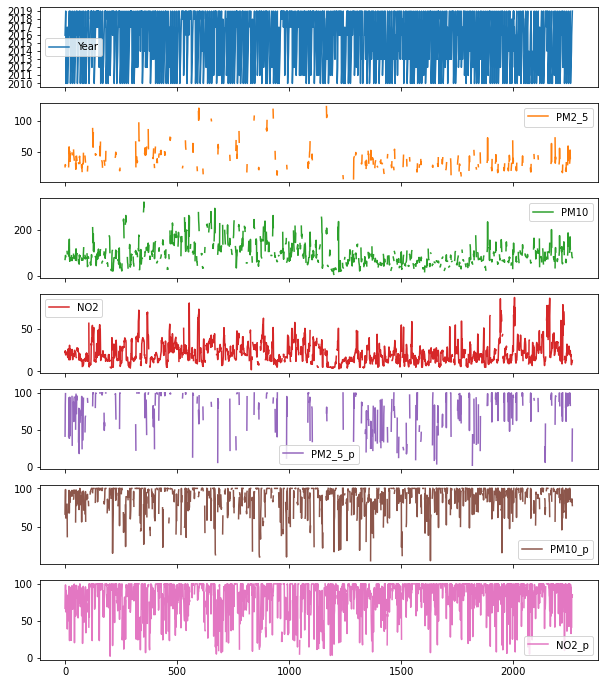

In [22]:
#subplots of data
df1.plot(subplots=True, figsize=(10, 12))

Now to accelerate our analysis, we select the cities (region-wise) and specifically focus on them. The main parameters or factors in study from now on will be PM2.5, PM10 and NO2.

The four cities selected are Agra (Uttar Pradesh- North), Bangalore (Karnataka- South), Balasore (Odisha- East) and Surat (Gujarat- West)

The best plot to describe a time series data is Line Graph. So, to study the pattern of the cities, we plot line graphs for each using the above mentioned factors. Along with this, to study the correlation between the factors, we plot a heatmap (similar to correlation matrix).

In [23]:
#extracting the data for Agra
group=d1.groupby(df.City)
c1=group.get_group("Agra")
print(c1)
a=c1.iloc[:,3:7]
a.set_index("Year",inplace=True)
a

     Country   Region  City       Year   PM2_5    PM10    NO2    PM2_5_p  \
1160    India  North   Agra 2010-01-01   36.00   88.00  26.33  82.692308   
1161    India  North   Agra 2011-01-01   36.00   88.00  19.60  82.692308   
1162    India  North   Agra 2012-01-01   36.00   88.00  23.00  82.692308   
1163    India  North   Agra 2013-01-01   36.00   88.00  22.50  82.692308   
1164    India  North   Agra 2014-01-01   36.00   88.00  18.83  82.692308   
1165    India  North   Agra 2016-01-01   36.00  198.00  22.50  82.692308   
1166    India  North   Agra 2017-01-01  123.50  184.50  19.17  72.836539   
1167    India  North   Agra 2018-01-01  105.75  209.00  21.67  80.769231   
1168    India  North   Agra 2019-01-01  109.67  185.83  24.50  62.500000   

         PM10_p       NO2_p  
1160  94.230769  100.000000  
1161  94.230769   95.384615  
1162  94.230769   88.301282  
1163  94.230769   83.653846  
1164  94.230769   91.346154  
1165  89.262821   88.301282  
1166  84.775641   84.935897  

,PM2_5,PM10,NO2
Year,,,
2010-01-01,36.00,88.00,26.33
2011-01-01,36.00,88.00,19.60
2012-01-01,36.00,88.00,23.00
2013-01-01,36.00,88.00,22.50
2014-01-01,36.00,88.00,18.83
2016-01-01,36.00,198.00,22.50
2017-01-01,123.50,184.50,19.17
2018-01-01,105.75,209.00,21.67
2019-01-01,109.67,185.83,24.50


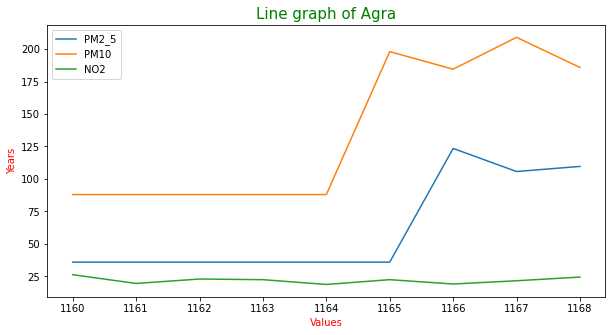

In [24]:
#line-graph of Agra

plt.figure(figsize=(10,5))
plt.xlabel("Values",color='red',fontsize=10)
plt.ylabel("Years",color='red',fontsize=10)
plt.title("Line graph of Agra",color='green',fontsize=15)
lines=plt.plot(c1[['PM2_5','PM10','NO2']])
plt.legend(lines[:3], ['PM2_5', 'PM10','NO2']);

The line graph of Agra gives an usual trend or non-stationarity in all the associated factors.

<AxesSubplot:>

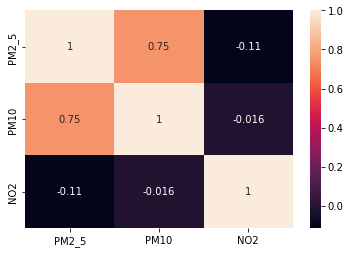

In [25]:
#heatmap
corrmat1=a.corr()
sns.heatmap(corrmat1,annot=True)

The heatmap shows a strong-positive relation between the variables PM2.5 and PM10.

In [26]:
#extracting data for Bangalore
group=d1.groupby(df.City)
c2=group.get_group("Bangalore")
print(c2)
b=c2.iloc[:,3:7]
b
b.set_index("Year",inplace=True)
b

     Country  Region       City       Year  PM2_5    PM10    NO2    PM2_5_p  \
1347    India  South  Bangalore 2010-01-01  36.00   88.00  30.67  82.692308   
1348    India  South  Bangalore 2011-01-01  36.00   88.00  29.29  82.692308   
1349    India  South  Bangalore 2012-01-01  36.00   88.00  28.57  82.692308   
1350    India  South  Bangalore 2013-01-01  36.00   88.00  25.88  82.692308   
1351    India  South  Bangalore 2014-01-01  36.00   88.00  28.20  82.692308   
1352    India  South  Bangalore 2016-01-01  51.20  103.00  31.25  82.500000   
1353    India  South  Bangalore 2017-01-01  46.14   91.56  30.67  63.736264   
1354    India  South  Bangalore 2018-01-01  47.40   89.75  29.62  64.230769   
1355    India  South  Bangalore 2019-01-01  32.38   78.62  25.75  56.129808   

         PM10_p      NO2_p  
1347  94.230769  67.521367  
1348  94.230769  69.368132  
1349  94.230769  90.934066  
1350  94.230769  92.427885  
1351  94.230769  93.846154  
1352  87.379808  87.379808  
1353  

,PM2_5,PM10,NO2
Year,,,
2010-01-01,36.00,88.00,30.67
2011-01-01,36.00,88.00,29.29
2012-01-01,36.00,88.00,28.57
2013-01-01,36.00,88.00,25.88
2014-01-01,36.00,88.00,28.20
2016-01-01,51.20,103.00,31.25
2017-01-01,46.14,91.56,30.67
2018-01-01,47.40,89.75,29.62
2019-01-01,32.38,78.62,25.75


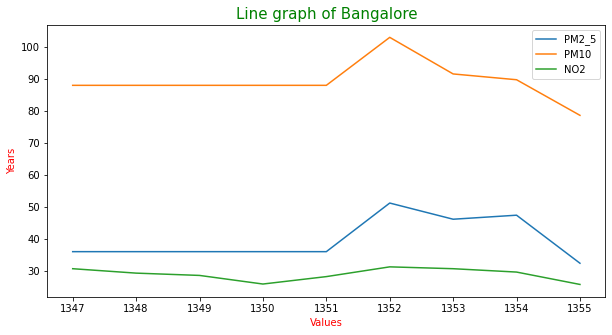

In [27]:
#line-graph
plt.figure(figsize=(10,5))
plt.xlabel("Values",color='red',fontsize=10)
plt.ylabel("Years",color='red',fontsize=10)
plt.title("Line graph of Bangalore",color='green',fontsize=15)
lines=plt.plot(c2[['PM2_5','PM10','NO2']],)
plt.legend(lines[:3], ['PM2_5', 'PM10','NO2']);

The line graph of Bangalore gives an usual trend or non-stationarity in all the associated factors.

<AxesSubplot:>

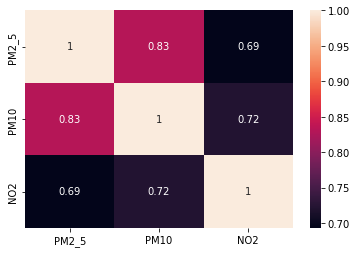

In [28]:
#heatmap
corrmat2=b.corr()
sns.heatmap(corrmat2,annot=True)

The heatmap, in case of Bangalore, shows a strong-positive correlation between PM2.5 and PM10 as well as PM10 and NO2. It also shows a strong relation between PM2.5 and NO2. The variables are highly correlated among each other.

In [29]:
#extracting data for Balasore
group=d1.groupby(df.City)
c3=group.get_group("Balasore")
print(c3)
c=c3.iloc[:,3:7]
c
c.set_index("Year",inplace=True)
c

    Country  Region      City       Year  PM2_5   PM10    NO2     PM2_5_p  \
130    India   East  Balasore 2010-01-01  36.00  88.00  12.00   82.692308   
131    India   East  Balasore 2011-01-01  36.00  88.00  12.00   82.692308   
132    India   East  Balasore 2012-01-01  36.00  88.00  14.00   82.692308   
133    India   East  Balasore 2013-01-01  36.00  88.00  13.00   82.692308   
134    India   East  Balasore 2014-01-01  36.00  88.00  12.33   82.692308   
135    India   East  Balasore 2016-01-01  47.00  85.00  12.33   80.448718   
136    India   East  Balasore 2017-01-01  45.00  83.00  11.33   99.038461   
137    India   East  Balasore 2018-01-01  47.00  85.67  11.33  100.000000   
138    India   East  Balasore 2019-01-01  46.33  86.00  11.00   99.679487   

         PM10_p       NO2_p  
130   94.230769   96.153846  
131   94.230769   99.038461  
132   94.230769   65.705128  
133   94.230769   85.256410  
134   94.230769   69.230769  
135   82.051282   82.051282  
136   99.038461   9

,PM2_5,PM10,NO2
Year,,,
2010-01-01,36.00,88.00,12.00
2011-01-01,36.00,88.00,12.00
2012-01-01,36.00,88.00,14.00
2013-01-01,36.00,88.00,13.00
2014-01-01,36.00,88.00,12.33
2016-01-01,47.00,85.00,12.33
2017-01-01,45.00,83.00,11.33
2018-01-01,47.00,85.67,11.33
2019-01-01,46.33,86.00,11.00


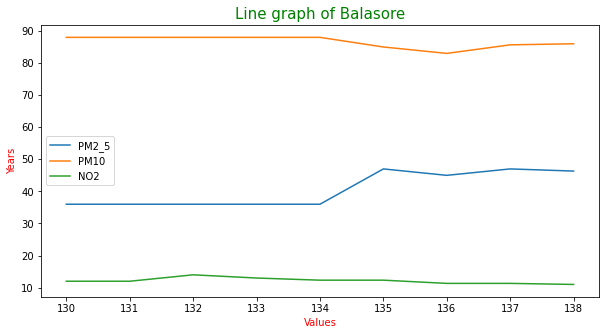

In [30]:
#line-graph
plt.figure(figsize=(10,5))
plt.xlabel("Values",color='red',fontsize=10)
plt.ylabel("Years",color='red',fontsize=10)
plt.title("Line graph of Balasore",color='green',fontsize=15)
lines=plt.plot(c3[['PM2_5','PM10','NO2']],)
plt.legend(lines[:3], ['PM2_5', 'PM10','NO2']);

The line graph of Balasore gives an usual trend or non-stationarity in all the associated factors.

<AxesSubplot:>

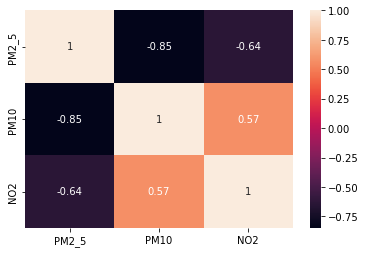

In [31]:
#heatmap
corrmat3=c.corr()
sns.heatmap(corrmat3,annot=True)

The heatmap here shows to be strong-negatively correlated between PM10 and PM2.5. 

In [32]:
#extracting data for Surat
group=d1.groupby(df.City)
c4=group.get_group("Surat")
print(c4)
d=c4.iloc[:,3:7]
d
d.set_index("Year",inplace=True)
d

     Country  Region   City       Year  PM2_5    PM10    NO2     PM2_5_p  \
2199    India   West  Surat 2010-01-01  36.00   88.00  24.00   82.692308   
2200    India   West  Surat 2011-01-01  36.00   88.00  26.33   82.692308   
2201    India   West  Surat 2012-01-01  36.00   88.00  25.67   82.692308   
2202    India   West  Surat 2013-01-01  36.00   88.00  19.33   82.692308   
2203    India   West  Surat 2014-01-01  36.00   88.00  19.67   82.692308   
2204    India   West  Surat 2016-01-01  31.33   92.00  22.33   88.782051   
2205    India   West  Surat 2017-01-01  35.33  106.33  25.67  100.000000   
2206    India   West  Surat 2018-01-01  56.33  176.33  29.00  100.000000   
2207    India   West  Surat 2019-01-01  40.00  127.67  27.00   82.692308   

          PM10_p       NO2_p  
2199   94.230769  100.000000  
2200   94.230769  100.000000  
2201   94.230769   59.615385  
2202   94.230769   85.897436  
2203   94.230769   65.384615  
2204   88.782051   88.782051  
2205  100.000000  100.

,PM2_5,PM10,NO2
Year,,,
2010-01-01,36.00,88.00,24.00
2011-01-01,36.00,88.00,26.33
2012-01-01,36.00,88.00,25.67
2013-01-01,36.00,88.00,19.33
2014-01-01,36.00,88.00,19.67
2016-01-01,31.33,92.00,22.33
2017-01-01,35.33,106.33,25.67
2018-01-01,56.33,176.33,29.00
2019-01-01,40.00,127.67,27.00


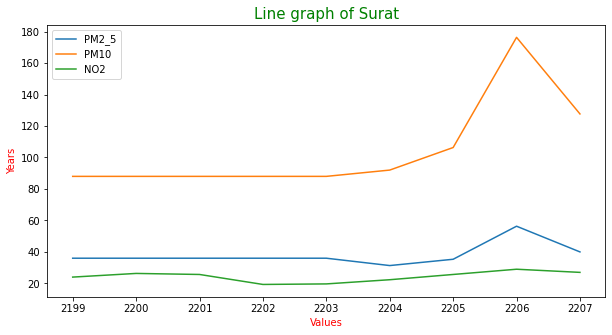

In [33]:
#line-graph
plt.figure(figsize=(10,5))
plt.xlabel("Values",color='red',fontsize=10)
plt.ylabel("Years",color='red',fontsize=10)
plt.title("Line graph of Surat",color='green',fontsize=15)
lines=plt.plot(c4[['PM2_5','PM10','NO2']],)
plt.legend(lines[:3], ['PM2_5', 'PM10','NO2']);

The line graph of Surat gives an usual trend or non-stationarity in all the associated factors.

<AxesSubplot:>

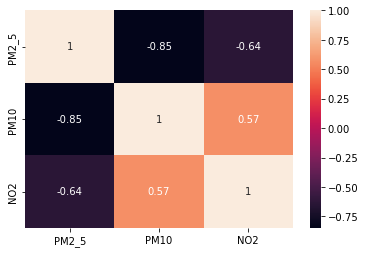

In [34]:
#heatmap
corrmat4=c.corr()
sns.heatmap(corrmat4,annot=True)

The heatmap in Surat shows to have a negative but strong relation between PM2.5 AND PM10 . 

# PREDICTIVE ANALYSIS- MOVING AVERAGE TIME SERIES

Next, we move on to the main analysis of the case study and start by decomposing the data.

Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting and hence, to have a clarity in the model, we decompose the data into Trend, Seasonality and Residuals.

PM2.5, known as the fine particles, is not only one of the important factors of air pollution, but also a key factor which affects the air environment quality in some areas. Moreover, PM2. 5 is greatest harmful to human health.
Therefore, we restrict our analysis only to PM2.5 (although it's not a dependent variable).

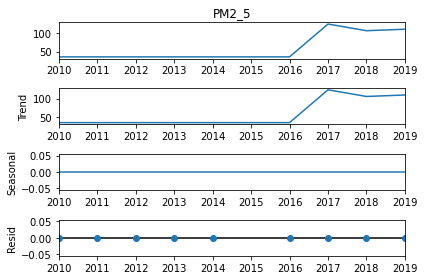

In [35]:
#decomposition for Agra
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(a['PM2_5'], model='additive', period=1)
result.plot()
plt.show() #first plot being the original one

The decomposition of Agra has a trend, i.e, it is non-stationary while there is no seasonality in the data since its a constant line. 

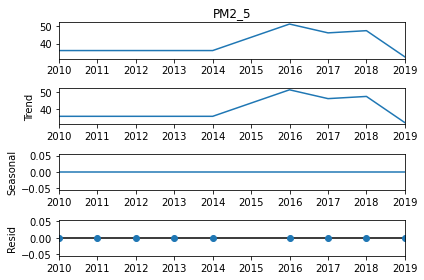

In [36]:
#decomposition for Bangalore 
result=seasonal_decompose(b['PM2_5'], model='additive', period=1)
result.plot()
plt.show() #first plot being the original one

The decomposition of Bangalore has a trend, i.e, it is non-stationary while there is no seasonality in the data since its a constant line. 

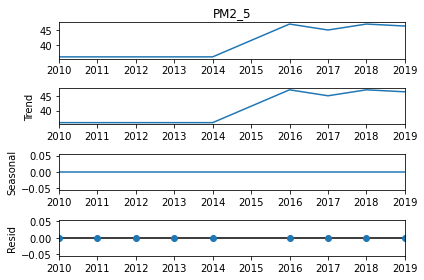

In [37]:
#decomposition for Balasore
result=seasonal_decompose(c['PM2_5'], model='additive', period=1)
result.plot()
plt.show() #first plot being the original one

The decomposition of Balasore has a trend, i.e, it is non-stationary while there is no seasonality in the data since its a constant line. 

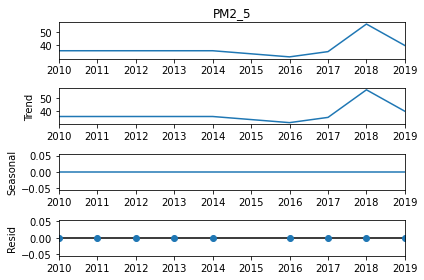

In [38]:
#decomposition for Surat
result=seasonal_decompose(d['PM2_5'], model='additive', period=1)
result.plot()
plt.show() #first plot being the original one

The decomposition of Surat has a trend, i.e., it is non-stationary while there is no seasonality in the data since its a constant line. 

The decomposition structure of every city shows that since the seasonality is constant throughout the years, there is no seasonal trend in the data or there is no seasonality in the data. 

As far as trend is concerned, we see there is non-stationarity or wee see a trend in every city. So, further we confirm this trend or non-stationarity using "Dickey-Fuller Test". This test gives us a "p-value" to conclude on the non-stationarity.

Trends can result in a varying mean over time and therefore if there is non-stationarity (trend) in the data, we use the method of "Differencing" to de-trend it. Differencing is a method of transforming a time series dataset. It can be used to remove the series dependence on time, so-called temporal dependence. This includes structures like trends and seasonality. 

In [39]:
#dickey fuller test to confirm non-stationarity

#H0: The model is non-stationary
#H1: The model is stationary
#We reject H0 at alpha level of significance if p value<0.05 (alpha)

from statsmodels.tsa.stattools import adfuller
dftest = adfuller(a['PM2_5'], autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val) 

1. ADF :  -0.8521619321683982
2. P-Value :  0.8033179238233332
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 8
5. Critical Values :
	 1% :  -4.6651863281249994
	 5% :  -3.3671868750000002
	 10% :  -2.802960625


We see the p value (0.8013) > 0.05 and hence we fail to reject H0 at alpha level of significance. Thus, we say there in non-stationarity or trend in the data. To remove this, we de-trend it using Differencing and check the trend again using Dickey Fuler Test.

<AxesSubplot:xlabel='Year'>

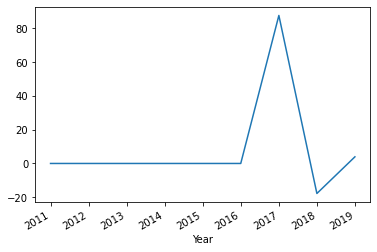

In [40]:
#method of differencing
a['PM2_5 first difference']=a['PM2_5']-a['PM2_5'].shift(1)
a['PM2_5 first difference'].plot()

In [41]:
#dickey-fuller test after de-trending the data
x=a['PM2_5 first difference'].dropna() 
result=adfuller(x)
print("ADF Statistics ",result[0])
print("p-value",result[1])
print("critical values",result[5])
if result[1]<=0.05:
    print("The data is stationary")
else:
    print("The data is non-stationary")

ADF Statistics  -3.1447205250916723
p-value 0.02341586382581255
critical values 53.553583497328106
The data is stationary


Now, the p value (0.02) < 0.05. Hence, we reject H0 and conclude there in no trend in the data. It is now stationary.
We carry on the analysis for the rest of cities in the similar manner.

In [42]:
#dftest for Bangalore

dftest = adfuller(b['PM2_5'], autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -1.743464969720068
2. P-Value :  0.40886850007678965
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 8
5. Critical Values :
	 1% :  -4.6651863281249994
	 5% :  -3.3671868750000002
	 10% :  -2.802960625


We see the p value (0.4088) > 0.05 and hence we fail to reject H0 at alpha level of significance. Thus, we say there in non-stationarity or trend in the data. To remove this, we de-trend it using Differencing and check the trend again using Dickey Fuler Test.

<AxesSubplot:xlabel='Year'>

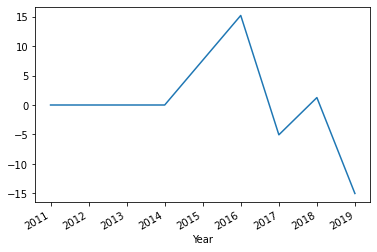

In [43]:
#Method of Differencing

b['PM2_5 first difference']=b['PM2_5']-b['PM2_5'].shift(1)
b['PM2_5 first difference'].plot()

In [44]:
#dickey fuller test after de-trending
x=b['PM2_5 first difference'].dropna()
result=adfuller(x)
print("ADF Statistics ",result[0])
print("p-value",result[1])
print("critical values",result[5])

if result[1]<=0.05:
    print("The data is stationary")
else:
    print("The data is non-stationary")

ADF Statistics  -1.7459368802744308
p-value 0.40761321095686864
critical values 37.889414145598806
The data is non-stationary


<AxesSubplot:xlabel='Year'>

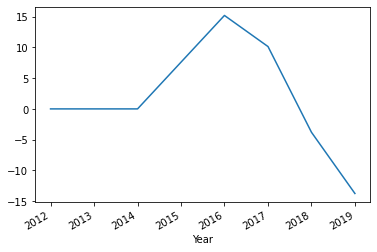

In [45]:
b['PM2_5 first difference']=b['PM2_5']-b['PM2_5'].shift(2)
b['PM2_5 first difference'].plot()

In [46]:
x=b['PM2_5 first difference'].dropna()
result=adfuller(x)
print("ADF Statistics ",result[0])
print("p-value",result[1])
print("critical values",result[5])

if result[1]<=0.05:
    print("The data is stationary")
else:
    print("The data is non-stationary")

ADF Statistics  -1.8722613391961385
p-value 0.3452206259753783
critical values 37.93864536907394
The data is non-stationary


We see, in the case of Bangalore, we needed to use the differencing method for the second time to de-trend the data. Even after that, trend or non-stationarity still persists in the data. So, we conclude there is a trend in this data.

In [47]:
#dftest for Balasore
dftest = adfuller(c['PM2_5'], autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -0.8705809973482174
2. P-Value :  0.7975061019973512
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 8
5. Critical Values :
	 1% :  -4.6651863281249994
	 5% :  -3.3671868750000002
	 10% :  -2.802960625


We see the p value (0.7975) > 0.05 and hence we fail to reject H0 at alpha level of significance. Thus, we say there in non-stationarity or trend in the data. To remove this, we de-trend it using Differencing and check the trend again using Dickey Fuler Test.

<AxesSubplot:xlabel='Year'>

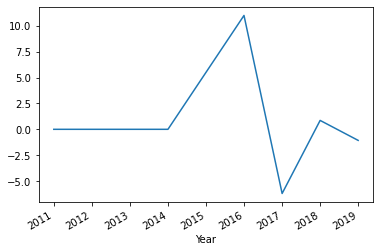

In [48]:
#Method of Differencing

c['PM2_5 first difference']=c['PM2_5']-b['PM2_5'].shift(1)
c['PM2_5 first difference'].plot()

In [49]:
#dickey fuller test after de-trending

x=c['PM2_5 first difference'].dropna()
result=adfuller(x)
print("ADF Statistics ",result[0])
print("p-value",result[1])
print("critical values",result[5])

if result[1]<=0.05:
    print("The data is stationary")
else:
    print("The data is non-stationary")

ADF Statistics  -3.8405338853651396
p-value 0.002518787631053146
critical values 33.90394960226483
The data is stationary


Now, the p value (0.02) < 0.05. Hence, we reject H0 and conclude there in no trend in the data anymore. 

In [50]:
#dftest for Surat

dftest = adfuller(d['PM2_5'], autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -11.124832073112907
2. P-Value :  3.3945925502107085e-20
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 7
5. Critical Values :
	 1% :  -4.9386902332361515
	 5% :  -3.477582857142857
	 10% :  -2.8438679591836733


Now, the p value (3.39e^-20) < 0.05. Hence, we reject H0 and conclude there in no trend in the data. Moreover, there is no need to use the method of differencing here, since we don't need to de-trend the data.

The final thing we do here is to predict the value using "Moving Average Time Series Analysis". 
The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. It is a statistical method used for forecasting long-term trends. We compare the predicted value with the observed value to check the similarity between the two values.

A finite MA model is always stationary. So we don't calculate the MA for non-stationary city (Bangalore).

In [51]:
#moving average for Agra
#updating the dataframe
a= a['PM2_5'].to_frame()

# calculating simple moving average
a['SMA09'] = a['PM2_5'].rolling(9).mean()

# removing all the NULL values using
# dropna() method

a.dropna(inplace=True)
a

,PM2_5,SMA09
Year,,
2019-01-01,109.67,61.657778


In [52]:
#Moving average for Balasore

c= c['PM2_5'].to_frame()
c['SMA09'] = c['PM2_5'].rolling(9).mean()
c.dropna(inplace=True)
c

,PM2_5,SMA09
Year,,
2019-01-01,46.33,40.592222


In [53]:
#Moving average for Surat

d= d['PM2_5'].to_frame()
d['SMA09'] = d['PM2_5'].rolling(9).mean()
d.dropna(inplace=True)
d

,PM2_5,SMA09
Year,,
2019-01-01,40.0,38.11


Finally, on seeing the predicted values given by the Moving Average Time Series, the values are similar to the observed values of the cities that we already have in the dataset. We can conveniently conclude how the dataset worked well with the MA Time Series Technique to give an interpretation between predicted and observed value of the year 2019 for Agra, Balasore and Surat.

# CONCLUSION:

Based on these values, we see the PM 2.5 value to be the highest in Agra. This may be because of high temperatures and dust storms entering the city from Rajasthan leading the poor air quality and hence, Agra is ranked fourth among the cities with the poorest air quality.

Speaking about Balasore (Odisha), The National Green Tribunal (NGT) in its hearing on November 10, 2018 observed that in Odisha, the primary reasons of air pollution are vehicular emission, road dust, industrial pollution, pollution from construction, and demolition work.Particulate Matter in ambient air of urban areas is mainly contributed by vehicular emission, fuel quality, MSW management, road conditions etc. Textile processing industries located in and around the city of Surat are also sources of PM emission.

Reducing pollutants in the air is important for human health and the environment. Air pollution is causing to be one of the most essential reasons for peoples' poor health and so, required measures need to be taken not only by the government, but also by the people of the nation as the responsible citizens. 

We have thus explored the analysis based on Time Series with respect to Trends and Seasonality in our case study. 